Import Libraries

In [2]:
import numpy as np
import h5py
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import joblib

Load Data

In [3]:
h5_file = r'D:\Ali_Thesis\synthetic_data_generation\Data\Process_canada_data\P13_5_sec_30hz_sequences_sensor_data.h5'
dataset_name = 'data'

In [4]:
# Load the HDF5 file
with h5py.File(h5_file, 'r') as f:
    X = f[dataset_name][:]
    print(f"Loaded data shape: {X.shape}")

Loaded data shape: (417840, 6, 150)


In [7]:
# Initialize a list to store the normalized data per channel or group
normalized_list = []
scalers = {}

# Normalize channel 0 separately **first**
scaler_0 = MinMaxScaler(feature_range=(0, 1))
data_0 = X[:, 0, :].reshape(-1, X.shape[-1])
normalized_0 = scaler_0.fit_transform(data_0)
normalized_list.append(normalized_0.reshape(X.shape[0], 1, X.shape[2]))  # Maintain shape
scalers[0] = scaler_0  # Save the scaler

# Normalize channels 1, 2, and 3 **together**
scaler_group = MinMaxScaler(feature_range=(0, 1))
data_group = X[:, 1:4, :].reshape(-1, X.shape[-1])
normalized_group = scaler_group.fit_transform(data_group)
normalized_list.append(normalized_group.reshape(X.shape[0], 3, X.shape[2]))  # Maintain shape
scalers["1_2_3"] = scaler_group  # Store shared scaler

# Normalize channel 4 separately **last**
scaler_4 = MinMaxScaler(feature_range=(0, 1))
data_4 = X[:, 4, :].reshape(-1, X.shape[-1])
normalized_4 = scaler_4.fit_transform(data_4)
normalized_list.append(normalized_4.reshape(X.shape[0], 1, X.shape[2]))  # Maintain shape
scalers[4] = scaler_4  # Save the scaler

# Normalize channel 5 separately **last**
scaler_5 = MinMaxScaler(feature_range=(0, 1))
data_5 = X[:, 5, :].reshape(-1, X.shape[-1])
normalized_5 = scaler_5.fit_transform(data_5)
normalized_list.append(normalized_5.reshape(X.shape[0], 1, X.shape[2]))  # Maintain shape
scalers[5] = scaler_5  # Save the scaler

# Stack the normalized arrays along axis 1 to reconstruct the original shape
X_normalized = np.concatenate(normalized_list, axis=1)

# Save scalers to a file for future denormalization
joblib.dump(scalers, "min_max_scalers_grouped.pkl")

# Check if the shape is **exactly the same** after normalization
assert X.shape == X_normalized.shape, f"Shape mismatch! X: {X.shape}, X_normalized: {X_normalized.shape}"

# Print confirmation
print(f"Normalization successful! Shape after normalization: {X_normalized.shape}")

Normalization successful! Shape after normalization: (417840, 6, 150)


In [5]:
# Initialize a list to store the normalized data per channel or group
normalized_list = []
scalers = {}

# Normalize channel 0 separately **first**
scaler_0 = StandardScaler()
data_0 = X[:, 0, :].reshape(-1, X.shape[-1])
normalized_0 = scaler_0.fit_transform(data_0)
normalized_list.append(normalized_0.reshape(X.shape[0], 1, X.shape[2]))  # Maintain shape
scalers[0] = scaler_0  # Save the scaler

# Normalize channels 1, 2, and 3 **together**
scaler_group = StandardScaler()
data_group = X[:, 1:4, :].reshape(-1, X.shape[-1])
normalized_group = scaler_group.fit_transform(data_group)
normalized_list.append(normalized_group.reshape(X.shape[0], 3, X.shape[2]))  # Maintain shape
scalers["1_2_3"] = scaler_group  # Store shared scaler

# Normalize channel 4 separately **next**
scaler_4 = StandardScaler()
data_4 = X[:, 4, :].reshape(-1, X.shape[-1])
normalized_4 = scaler_4.fit_transform(data_4)
normalized_list.append(normalized_4.reshape(X.shape[0], 1, X.shape[2]))  # Maintain shape
scalers[4] = scaler_4  # Save the scaler

# Normalize channel 5 separately **last**
scaler_5 = StandardScaler()
data_5 = X[:, 5, :].reshape(-1, X.shape[-1])
normalized_5 = scaler_5.fit_transform(data_5)
normalized_list.append(normalized_5.reshape(X.shape[0], 1, X.shape[2]))  # Maintain shape
scalers[5] = scaler_5  # Save the scaler

# Stack the normalized arrays along axis 1 to reconstruct the original shape
X_normalized = np.concatenate(normalized_list, axis=1)

# Save scalers to a file for future denormalization
joblib.dump(scalers, "z_score_scalers_grouped.pkl")

# Check if the shape is **exactly the same** after normalization
assert X.shape == X_normalized.shape, f"Shape mismatch! X: {X.shape}, X_normalized: {X_normalized.shape}"

# Print confirmation
print(f"Z-score normalization successful! Shape after normalization: {X_normalized.shape}")


Z-score normalization successful! Shape after normalization: (417840, 6, 150)


In [6]:
X_normalized[0,5,:]

array([-0.0165224 , -0.01648041, -0.01644721, -0.01642896, -0.01643249,
       -0.01645167, -0.01647867, -0.01650817, -0.01653512, -0.01655662,
       -0.01657151, -0.01657983, -0.01657579, -0.0165643 , -0.01654602,
       -0.0165224 , -0.01649489, -0.01646829, -0.01643973, -0.01643441,
       -0.01644337, -0.01646686, -0.01650209, -0.01654277, -0.0165812 ,
       -0.01661711, -0.01661701, -0.01659507, -0.01655431, -0.01650176,
       -0.01644659, -0.01639667, -0.01634882, -0.01633946, -0.01634732,
       -0.01636867, -0.01639833, -0.01643082, -0.01646078, -0.01648498,
       -0.01650731, -0.01651158, -0.01650714, -0.01649421, -0.01647353,
       -0.01644659, -0.01641643, -0.01637346, -0.0163536 , -0.01634655,
       -0.01635575, -0.01638201, -0.01642268, -0.0164717 , -0.01654104,
       -0.01656966, -0.01657515, -0.016555  , -0.01651242, -0.01645555,
       -0.01639518, -0.01632117, -0.0162931 , -0.01628509, -0.01629524,
       -0.01631872, -0.01634926, -0.01638071, -0.0164199 , -0.01

In [15]:
scalers

{0: MinMaxScaler(),
 '1_2_3': MinMaxScaler(),
 4: MinMaxScaler(),
 5: MinMaxScaler()}

<function matplotlib.pyplot.show(close=None, block=None)>

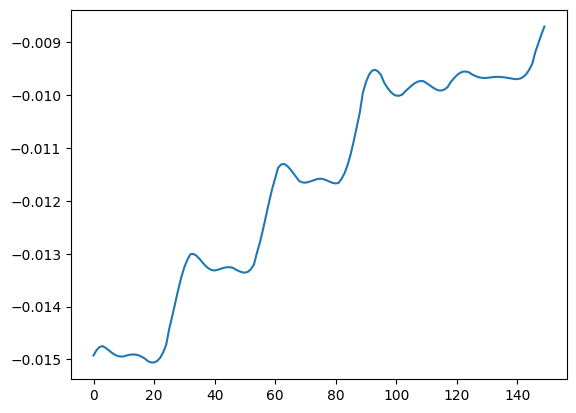

In [19]:
import matplotlib.pyplot as plt

plt.plot(X_normalized[4,5,:])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

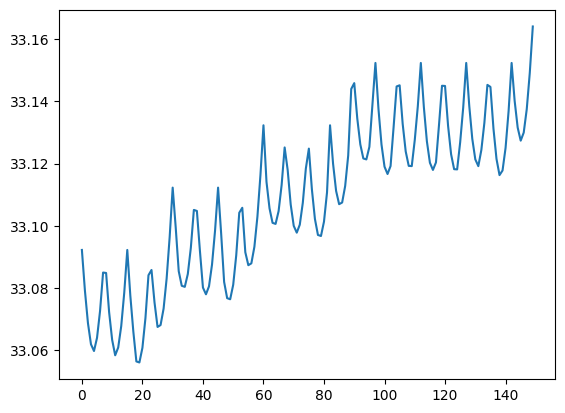

In [20]:
plt.plot(X[4,5,:])
plt.show

In [12]:
"""
Saves the data and timestamps to an HDF5 file.
"""
with h5py.File(r'P13_5_sec_30hz_sequences_sensor_data_std_normalized.h5', 'w') as h5file:
    h5file.create_dataset('data', data=X_normalized, compression='gzip', compression_opts=9)